# Lecture 17: Evolutionary invasion analysis II

## Lecture overview

1. [Evolutionarily stable strategies](#section1)
2. [Evolutionary convergence](#section2)
3. [Pairwise invasibility plots](#section3)
4. [Summary](#section4)

Let's pick up from the last lecture, where we've derived invasion fitness $\lambda(z_m,z)$, the selection gradient, and an evolutionary singular strategy $z^*$. 

When is this singular strategy stable?

<span id='section1'></span>
## 1. Evolutionarily stable strategies
<hr>

An evolutionarily singular strategy, $\hat{z}$, will only be an **evolutionarily stable strategy** (ESS), $z^*$, if it cannot be invaded.

Global evolutionary stability will be impossible to prove for most models and so we often focus on *local* stability, which requires that $\lambda(z_m,z)|_{z=\hat{z}}$ is concave at $z_m=\hat{z}$ (i.e., $\hat{z}$ is a local fitness maximum),

$$
\frac{\partial^2 \lambda}{\partial z_m^2}\bigg|_{z_m=\hat{z}, z=\hat{z}} < 0
$$

!!! note "The evolution of dispersal"

    The second derivative of invasion fitness with respect to the mutant trait value evalulated at the singular strategy is

    $$
    \frac{\partial^2 \lambda}{\partial d_m^2}\Big|_{d_m=d=\hat{d}} = -2(1-c)(1+c)^2
    $$

    Because $0<c<1$ this is always negative, which means the singular strategy is always evolutionarily stable.

<span id='section2'></span>
## 2. Evolutionary convergence
<hr>

There is one more characteristic of evolutionarily singular strategies that we care about, and
that is whether evolution actually leads to that strategy or not. For evolution to move the trait value towards a singular strategy, $\hat{z}$, we need evolution to increase the trait value when it is less than $\hat{z}$ and decrease the trait value when it is greater than $\hat{z}$. In other words, we need the selection gradient $\frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z}$ to decrease as we move through $z=\hat{z}$

$$
\frac{\mathrm{d}}{\mathrm{d} z}\left( \frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z} \right)_{z=\hat{z}} < 0
$$

Singular strategies that satisfy this criteria are said to be **convergence stable**. 

Interestingly, not all evolutionarily stable strategies are convergence stable and not all convergence stable singular strategies are evolutionarily stable! Evolutionarily stable strategies that are not convergence stable are called **Garden of Eden strategies**. Singular strategies that are convergence stable but not evolutionarily stable are called **evolutionary branching points**. The latter are of particular interest because the system evolves towards a state where multiple strategies can invade and coexist, leading to diversification.

!!! note "The evolution of dispersal"

    The derivative of the selection gradient evaluated at the singular strategy is

    $$
    \frac{\mathrm{d}}{\mathrm{d} d}\left( \frac{\partial \lambda}{\partial d_m}\Big|_{d_m=d} \right)_{d=\hat{d}} = -(1-c)(1+c)^3
    $$

    Because $0<c<1$ this is always negative, which means the singular strategy is always convergence stable.

<span id='section3'></span>
## 3. Pairwise invasibility plots
<hr>

A helpful way to visualize the two types of stability of an evolutionarily singular strategy is called a **pairwise invasibility plot** (PIP). In this plot we have the resident trait value $z$ on the x-axis, the mutant trait value $z_m$ on the y-axis, and we color in the regions where the mutant can invade, $\lambda(z_m,z)>1$.

The four types of evolutionarily singular strategies $\hat{z}$ are then represented by the following PIPs

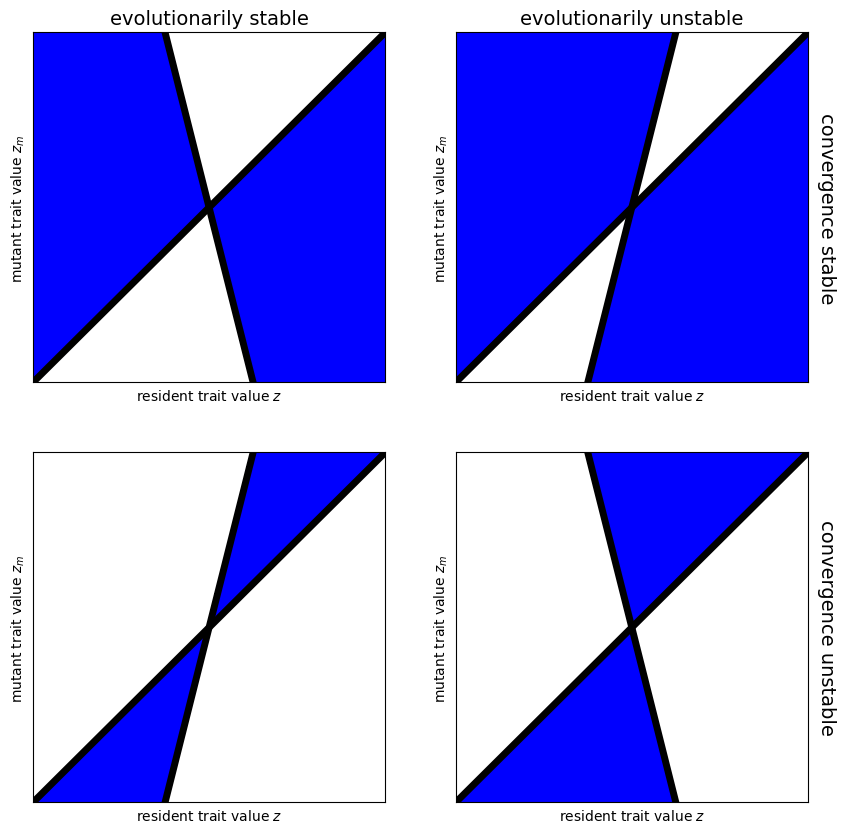

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# dummy invasion fitness
def inv(x, y, slope, z=1):
    if y < x:
      if y > slope * x:
        return z
    if y > x:
      if y < slope * x:
        return z
    return 1-z

# evaluate
def compute_pip(slope=-2,z=1,xmin=-2,xmax=2,steps=100):
    xs = np.linspace(xmin,xmax,steps)
    X,Y = np.meshgrid(xs,xs) # X and Y values
    # store the invasion success in a matrix
    PIP = []
    for y in xs:
      row = []
      for x in xs:
        row.append(inv(x,y,slope,z))
      PIP.append(row)
    return X,Y,PIP

# plot
def plotfun(X,Y,Z,slope=1,ax=None):
    if ax==None:
      fig, ax=plt.subplots(1,1,figsize=(5,5))
    ax.contourf(X,Y,Z, colors=['white','black','blue','black'])
    ax.plot(X[0],X[0],'k',lw=5)
    ax.plot(X[0],X[0]*slope,'k',lw=5)
    ax.set_xlim(min(X[0]),max(X[0]))
    ax.set_ylim(min(X[0]),max(X[0]))
    ax.set_xlabel('resident trait value $z$')
    ax.set_ylabel('mutant trait value $z_m$')
    ax.set_xticks([])
    ax.set_yticks([])

fig, axs = plt.subplots(2,2,figsize=(10,10))
X,Y,Z = compute_pip(slope=-4,z=1)
plotfun(X,Y,Z,slope=-4,ax=axs[0][0])
axs[0][0].set_title('evolutionarily stable',fontsize=14)
axs[0][1].text(2.1,0,'convergence stable',fontsize=14,rotation=270,verticalalignment='center')
X,Y,Z = compute_pip(slope=4,z=0)
plotfun(X,Y,Z,slope=4,ax=axs[0][1])
axs[0][1].set_title('evolutionarily unstable',fontsize=14)
X,Y,Z = compute_pip(slope=4,z=1)
plotfun(X,Y,Z,slope=4,ax=axs[1][0])
axs[1][1].text(2.1,0,'convergence unstable',fontsize=14,rotation=270,verticalalignment='center')
X,Y,Z = compute_pip(slope=-4,z=0)
plotfun(X,Y,Z,slope=-4,ax=axs[1][1])

We can read a PIP by choosing a resident trait value (a point on the x-axis) and looking to see what mutant trait values can invade it (blue regions in that vertical slice). Choose one of the possible invading trait values and set this to be the new resident trait value. Continue indefinitely. 

When we assume mutants have trait values close to the resident, we restrict ourselves to moving along the 1:1 line. Then, we move to the right when there is blue directly above the 1:1 line but not below and we move to the left when there is blue directly below the 1:1 line but not above. Where there is blue directly above and below the 1:1 we are at a singular strategy that is a fitness minimum (it can be invaded in both directions). Where there is white directly above and below the 1:1 we are at a singular strategy that is a fitness maximum (it can't be invaded in either direction).

Try reading each of the plots above. Prove to yourself that the top left has a convergence stable evolutionarily stable strategy, the top right has a branching point, the bottom left has a has a Garden of Eden, and the bottom right has an invasible repellor (a fitness minimum that is not convergence stable).

!!! note "The evolution of dispersal"

    In our model of the evolution of dispersal, the singular strategy is always evolutionarily and convgence stable, and the PIP is below.

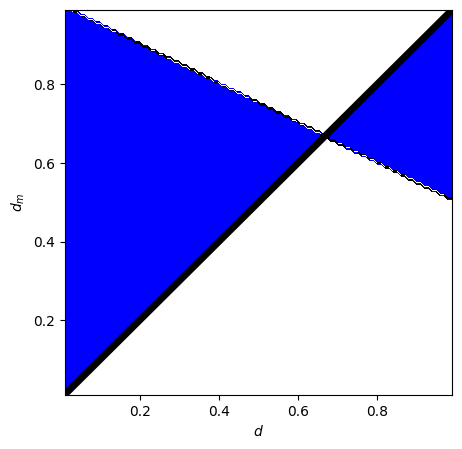

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# invasion fitness
def inv_fun(dm,d,c):
    invasionfitness = (1-dm)/(1-dm + d*(1-c)) + (dm*(1-c))/(1-d + d*(1-c))
    if invasionfitness>1:
        return 1 # return 1 if mutant invades
    return 0 # return 0 if mutant does not invade

# evaluate
def compute_pip(c=0.5,dmin=0.01,dmax=0.99,steps=100):
    ds = np.linspace(dmin,dmax,steps)
    X,Y = np.meshgrid(ds,ds) # X and Y values
    # store the invasion success in a matrix
    PIP = []
    for dm in ds:
      row = []
      for d in ds:
        row.append(inv_fun(dm,d,c))
      PIP.append(row)
    return X,Y,PIP

# plot
def plotfun(X,Y,Z):
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.set_xlabel('$d$')
    ax.set_ylabel('$d_m$')
    ax.contourf(X,Y,Z, colors=['white','black','blue','black'])
    ax.plot(X[0],X[0],'k',lw=5)

X,Y,Z=compute_pip()
plotfun(X,Y,Z)

<span id='section4'></span>
## 4. Summary
<hr>

- An evolutionary singular strategy is an evolutionary stable strategy (cannot be invaded by small mutations) if $\frac{\partial^2 \lambda}{\partial z_m^2}\bigg|_{z_m=\hat{z}, z=\hat{z}} < 0$
- An evolutionary singular strategy is convergence stable (i.e., evolution converges to it, at least locally) if $\frac{\mathrm{d}}{\mathrm{d} z}\left( \frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z} \right)_{z=\hat{z}} < 0$
- We can summarize the evolutionary and convergence stability of evolutionary singular strategies with pairwise invasibility plots

Practice questions from the textbook: 12.3-8